In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
vino=pd.read_csv('/content/WineQT.csv')

In [6]:
vino


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [7]:
X=vino.drop('quality',axis=1)
y=vino['quality']

In [11]:
X=vino.drop('Id',axis=1)

In [18]:
X=X.drop('quality',axis=1)

In [22]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [20]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [21]:
X_scaled

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [25]:
#método del codo
from sklearn.cluster import KMeans

In [30]:
#distancias de cada dato al centroide
inertias=[]
rango=range(1,11)
for k in rango:
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(X_scaled)
  inertias.append(km.inertia_)



In [27]:
import matplotlib.pyplot as plt

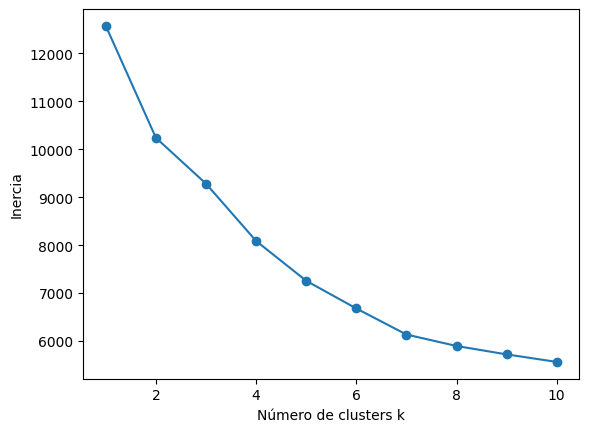

In [29]:
plt.plot(rango,inertias,marker='o')
plt.xlabel('Número de clusters k')
plt.ylabel('Inercia')
plt.show()

In [50]:
df=pd.DataFrame()

In [81]:
k=3
km=KMeans(n_clusters=k,random_state=42)
labels=km.fit(X_scaled)
df['cluster']=labels.labels_

In [82]:
df.value_counts()

,count
cluster,
1,724
0,400
2,19


In [83]:
centroids_scaled = km.cluster_centers_
centroids_scaled

array([[ 0.94550617, -0.68141437,  0.98441632,  0.27638979, -0.0167765 ,
        -0.23916507, -0.23604579,  0.52529662, -0.63213735,  0.38348766,
         0.24295081],
       [-0.52497962,  0.37589843, -0.58231363, -0.14300896, -0.1498316 ,
         0.13142015,  0.11592787, -0.29510176,  0.39572368, -0.30767168,
        -0.10983866],
       [ 0.09909343,  0.02185728,  1.4646599 , -0.36933841,  6.06256206,
         0.02725466,  0.5519232 ,  0.18605407, -1.77100006,  3.65048567,
        -0.92932306]])

In [84]:
centroids_original = scaler.inverse_transform(centroids_scaled)

In [85]:
centroids_df = pd.DataFrame(centroids_original, columns=X.columns)
centroids_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.962750,0.408987,0.461900,2.906750,0.086140,13.165000,38.180000,0.997741,3.212025,0.723025,10.704917
1,7.394061,0.598833,0.153881,2.338329,0.079854,16.962017,49.713398,0.996163,3.372983,0.605304,10.323297
2,8.484211,0.535263,0.556316,2.031579,0.373368,15.894737,64.000000,0.997088,3.033684,1.279474,9.436842


In [86]:
centroids_df['Cluster'] = centroids_df.index

In [87]:
centroids_df['Cluster']

,Cluster
0,0
1,1
2,2


In [88]:
pca = PCA(n_components=2, random_state=42)


In [89]:
X_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'PCA 2')

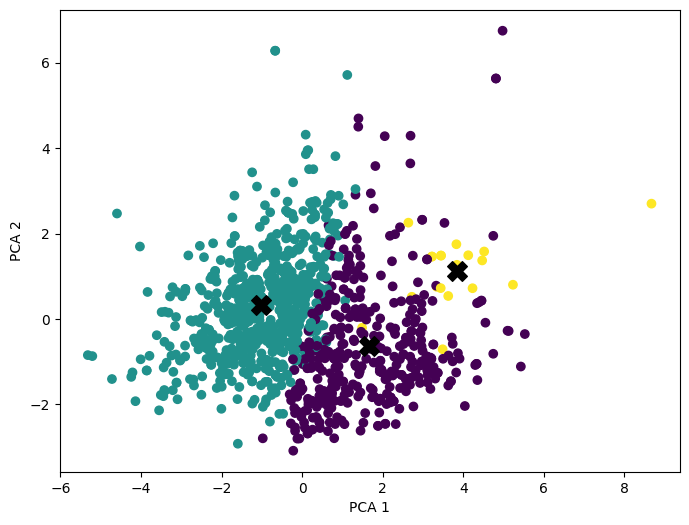

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=df['cluster'])
centroids_pca = pca.transform(centroids_scaled)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c='black', marker='X', s=200, label='Centroides')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')